# Imports
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from pylab import rcParams

%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

import scipy
import statsmodels.formula.api as sm

# Custom curve fitting example
***

a = 2.883938061221105e-05 , b = 0.00834631376647165, c = -0.24627487866865314


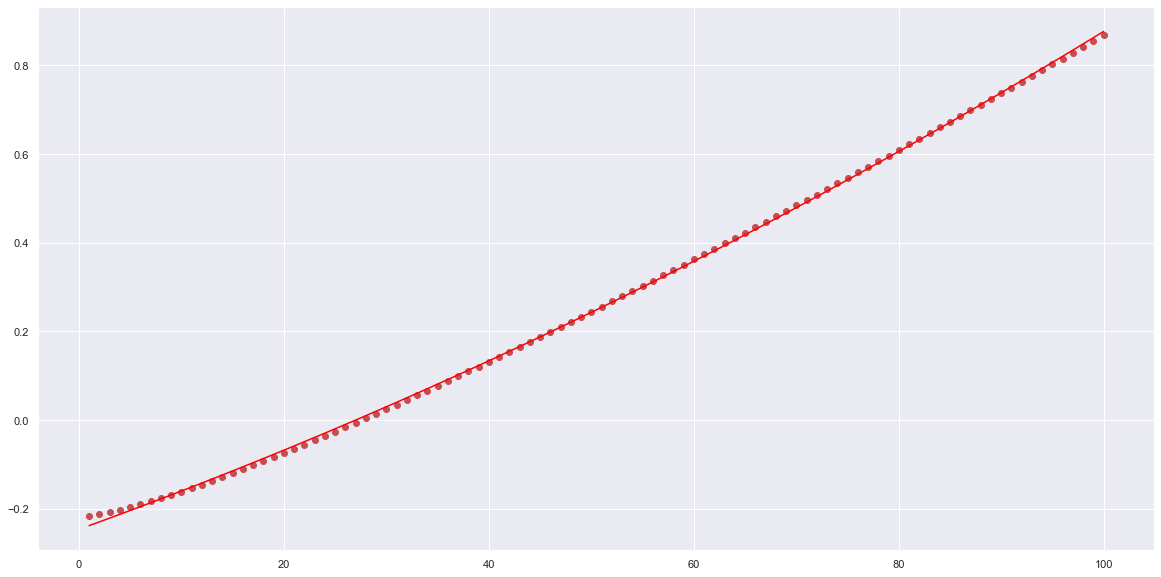

In [4]:
# Factors to retrieve that define the data
a_th = 0.0023522243241053064
b_th = -0.21545312239480827

# Generating data
x = np.linspace(1, 100, 100)
y = a_th*x*np.log(x) + b_th

# Plotting data
plt.plot(x, y, 'ro',label="Original Data")


# Function that we want to fit to the data
def func(x, a, b, c):
    return a*x**2 + b*x + c


# Fitting curve to data
popt, pcov = scipy.optimize.curve_fit(func, x, y)

# Printing retrived factors
print("a = {} , b = {}, c = {}".format(popt[0], popt[1], popt[2]))

# Plotting fitted curve on top of data
plt.plot(x, func(x, *popt), label="Fitted Curve", color="red")
plt.show()

# Example regression with fitted curve
***

In [3]:
# Put data into DF
df = pd.concat([pd.Series(x), pd.Series(y)], axis=1)
df.columns = ['x', 'y']

# Getting estimated factors
a = popt[0]
b = popt[1]
c = popt[2]


# Create formula string
formula_str = df.columns[-1] + ' ~ ' + 'func(x, a, b, c)'
print(formula_str)

model=sm.ols(formula=formula_str, data=df)

fitted = model.fit()

fitted.summary()

y ~ func(x, a, b, c)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.638e+05
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          9.71e-177
Time:                        18:55:44   Log-Likelihood:                 381.25
No. Observations:                 100   AIC:                            -758.5
Df Residuals:                      98   BIC:                            -753.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7.425e-12      0.001  -1.05e-08      1.000      -0.001       0.001
func(x, a, b, c)     1.0000      0.002    603.159      0.000       0.997       1.003
==============================================================================
Omnibus:                       23.993   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.227
Skew:                           1.004   Prob(JB):                     1.12e-09
Kurtosis:                       5.422   Cond. No.                         3.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""